# FRC Match Metrics
Displays the results of a FRC match in a series of charts

## Setup
In your venv install pandas and matplotlib: 
  `pip install pandas matplotlib`
* If you are using VS Code, it should ask you to install the IPython extensions.
* If this next cell runs with no errors, you should be all set.

In [1]:
import util
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### Default Team
Some parts of this notebook depend on a team you are interested in.  Other parts of this notebook need to look up the team name.  This section defines a function to look up the team name and then sets a couple of "constants" for later use.

In [20]:

def get_team_name(team_id):
    url = f'https://www.thebluealliance.com/api/v3/team/{team_id}'
    return util.call_tba_api(url).json()['nickname']

TEAM = 'frc6223'
TEAM_NAME = get_team_name(TEAM)
TEAM_NAME

'Arsenal of Engineering'

### Default Event

In [9]:
def get_event_name(event_id):
    url = f'https://www.thebluealliance.com/api/v3/event/{EVENT_KEY}/simple'
    resp = util.call_tba_api(url).json()
    return str(resp['year']) + ' ' + resp['name']

EVENT_KEY = '2024wimi'
EVENT_NAME = get_event_name(EVENT_KEY)
EVENT_NAME

'2024 Wisconsin Regional'

## Team Metrics at one Event
There are three special metrics from TBA at `/oprs`.  The other basic metrics are at `\rankings`.

In this section, we create a Pandas dataframe.  Think about it like a spreadsheet in memory.  There are a couple of techniques used here to best get the data out of the different JSON responses.
1. The OPR metrics are in a dictionary by team, so we can pull them into individual dataframes.
2. The other metrics are in an array by each team, so we have to:

    * Figure out what values they provide.
    * Create a dataframe with those headers
    * Loop through the teams and put the unlabeled values into an array. (I add a calculated one: ranking points)
    * Append that array to the dataframe
3. Then we merge the three dfs from 1 into 2.
4. We add the team name.  This is a pretty powerful syntax.  For each row, it calls a function using the team value and inserts the name value.

In [15]:
# Get calculated rankings
url = f'https://www.thebluealliance.com/api/v3/event/{EVENT_KEY}/oprs'
response = util.call_tba_api(url).json()

df_opr = pd.DataFrame.from_dict(response['oprs'], orient='index', columns=['opr'])
df_dpr = pd.DataFrame.from_dict(response['dprs'], orient='index', columns=['dpr'])
df_ccwm = pd.DataFrame.from_dict(response['ccwms'], orient='index', columns=['ccwm'])

# Get other rankings
url = f'https://www.thebluealliance.com/api/v3/event/{EVENT_KEY}/rankings'
response = util.call_tba_api(url).json()

# Find out what values they have and create a base dataframe
headers = ['team']
for x in response['sort_order_info']:
    headers.append(x['name'])
headers.append('Ranking Points')
df = pd.DataFrame(columns=headers)

# Loop through the teams and add a record with the team's ranking
for r in response['rankings']:
    record = [r['team_key']]
    for x in range(len(headers) - 2):
        record.append(r['sort_orders'][x])
    record.append(r['sort_orders'][0] * r['matches_played'])
    df.loc[len(df.index)] = record

# Merge the original metrics into our most recent dataframe
df = df.merge(df_opr, left_on='team', right_index=True)
df = df.merge(df_dpr, left_on='team', right_index=True)
df = df.merge(df_ccwm, left_on='team', right_index=True)

# Get team names
df['Name'] = df['team'].apply(get_team_name)

# Clean up variables we don't need
del df_ccwm, df_dpr, df_opr, url, response, r, record, x, headers

df

,team,Ranking Score,Avg Coop,Avg Match,Avg Auto,Avg Stage,Ranking Points,opr,dpr,ccwm,Name
0,frc6223,2.8,0.5,53.3,23.0,5.5,28.0,29.100187,5.322229,23.777958,Arsenal of Engineering
1,frc93,2.7,0.9,58.0,14.1,6.3,27.0,25.973682,13.620749,12.352932,NEW Apple Corps
2,frc1714,2.5,0.7,63.3,22.0,4.8,25.0,36.816284,12.184491,24.631793,MORE Robotics
3,frc1732,2.5,0.7,60.5,17.6,6.1,25.0,32.029102,22.349341,9.679761,Hilltopper Robotics
4,frc6381,2.3,0.7,57.9,17.6,6.3,23.0,20.982023,23.886740,-2.904717,Red Raider Robotics
5,frc9535,2.3,0.7,57.8,19.3,5.2,23.0,29.755144,5.414491,24.340653,The Knack
6,frc930,2.3,0.6,55.2,21.6,4.0,23.0,25.543970,7.517081,18.026889,Mukwonago BEARs
7,frc6823,2.2,0.8,45.1,17.6,4.1,22.0,17.501358,13.135633,4.365725,USM Robotics - Wildcats
8,frc3630,2.1,0.7,57.2,25.2,3.1,21.0,29.880589,12.981523,16.899066,Stampede
9,frc3381,2.1,0.5,45.0,12.6,4.1,21.0,16.727887,11.016743,5.711143,Droid Rage


## Function to Draw a Chart
This function draws a horizontal bar chart for the specified column.
Right now, it accesses "global" variables for `TEAM`, `TEAM_NAME` and `EVENT_NAME`.
You only need to run this cell once per session.

In [10]:
# Create a chart given a dataframe and other info
def print_chart(df, col, title, invert=False):
    # First, sort by the column we are interested in
    df = df.sort_values(by=col, ascending=invert, ignore_index=True) 

    # Get the figure and axis variables so we can configure it
    fig, ax = plt.subplots()

    # Create a horizontal bar chart with the data
    hbars = ax.barh(df['team'], df[col], align='center')

    # Highlight the team we are interested in
    i = df[df['team'] == TEAM].index.values[0]
    hbars[i].set_color('r')  

    # Turn off the labels - too noisy
    ax.get_yaxis().set_visible(False)

    # Make it descending - maybe pass this in...
    ax.invert_yaxis()

    # Get our score
    score = df[df['team'] == TEAM][col].values[0]

    team_loc = '#' + str(TEAM).replace('frc','') + ' ' + TEAM_NAME + ' at ' + EVENT_NAME + '\n'

    ax.set_title(team_loc  + title.replace('\n', f' = {score:.2f} (#{i + 1})\n'))
    plt.show()

    print(df[['team', col, 'Name']].iloc[:10])


## Print Charts

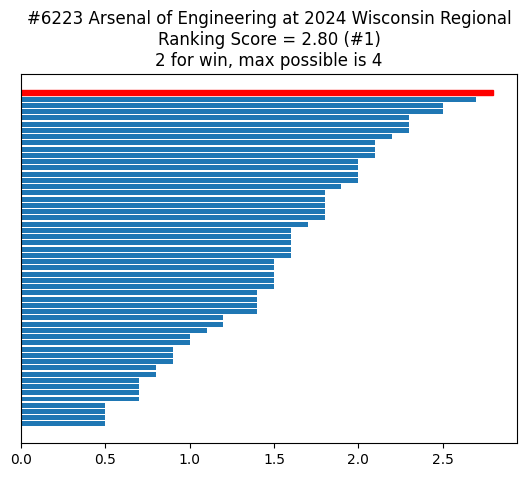

      team  Ranking Score                     Name
0  frc6223            2.8   Arsenal of Engineering
1    frc93            2.7          NEW Apple Corps
2  frc1714            2.5            MORE Robotics
3  frc1732            2.5      Hilltopper Robotics
4  frc6381            2.3      Red Raider Robotics
5  frc9535            2.3                The Knack
6   frc930            2.3          Mukwonago BEARs
7  frc6823            2.2  USM Robotics - Wildcats
8  frc3630            2.1                 Stampede
9  frc3381            2.1               Droid Rage


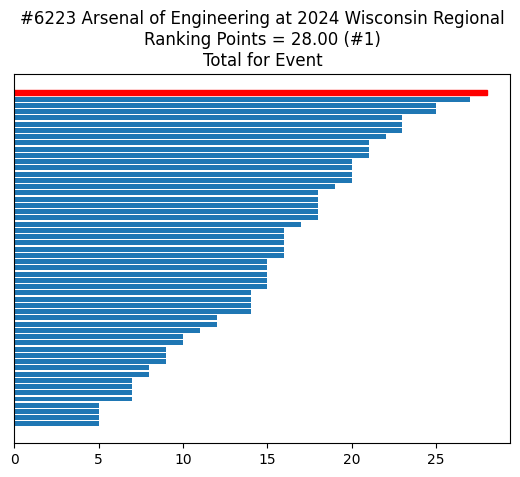

      team  Ranking Points                     Name
0  frc6223            28.0   Arsenal of Engineering
1    frc93            27.0          NEW Apple Corps
2  frc1714            25.0            MORE Robotics
3  frc1732            25.0      Hilltopper Robotics
4  frc6381            23.0      Red Raider Robotics
5  frc9535            23.0                The Knack
6   frc930            23.0          Mukwonago BEARs
7  frc6823            22.0  USM Robotics - Wildcats
8  frc3630            21.0                 Stampede
9  frc3381            21.0               Droid Rage


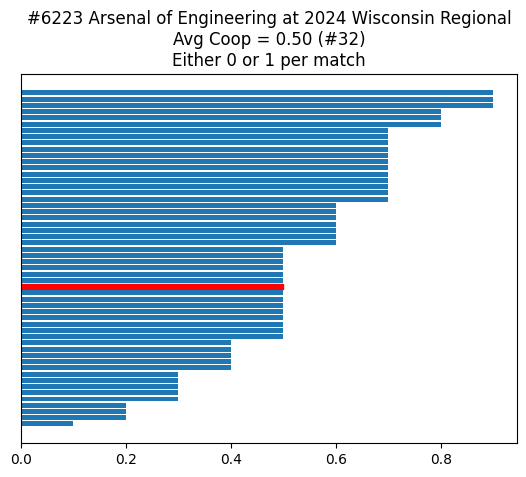

      team  Avg Coop                             Name
0  frc1306       0.9                       BadgerBOTS
1  frc5586       0.9                     Bond Brigade
2    frc93       0.9                  NEW Apple Corps
3  frc3891       0.8                   Rodeo Robotics
4  frc6823       0.8          USM Robotics - Wildcats
5  frc6421       0.8                      WarriorBots
6  frc1675       0.7  UPS (Ultimate Protection Squad)
7  frc2506       0.7                   Saber Robotics
8  frc1091       0.7                   Oriole Assault
9  frc1259       0.7                   Paradigm Shift


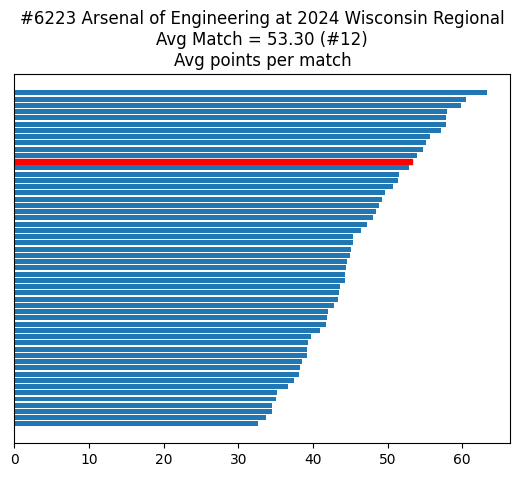

      team  Avg Match                      Name
0  frc1714       63.3             MORE Robotics
1  frc1732       60.5       Hilltopper Robotics
2  frc8744       59.8                Leviathans
3    frc93       58.0           NEW Apple Corps
4  frc6381       57.9       Red Raider Robotics
5  frc9535       57.8                 The Knack
6  frc3630       57.2                  Stampede
7  frc2194       55.7                Fondy Fire
8   frc930       55.2           Mukwonago BEARs
9  frc1781       54.8  Lindblom Electric Eagles


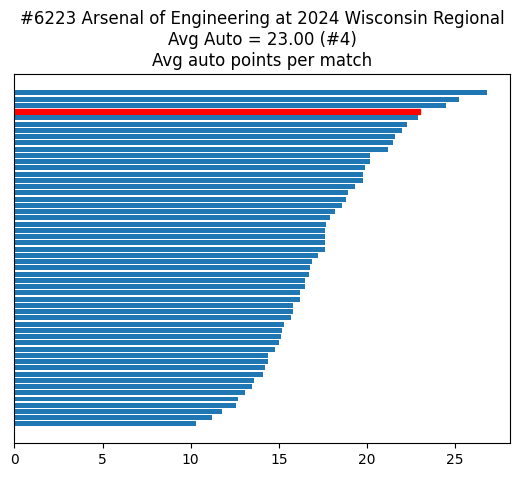

      team  Avg Auto                                          Name
0  frc8744      26.8                                    Leviathans
1  frc3630      25.2                                      Stampede
2  frc2830      24.5                          Riverside RoboTigers
3  frc6223      23.0                        Arsenal of Engineering
4  frc4531      22.9                                     STEAMpunk
5  frc8096      22.3                                   Cache Money
6  frc1714      22.0                                 MORE Robotics
7   frc930      21.6                               Mukwonago BEARs
8  frc2667      21.5                         Knights of the Valley
9  frc7103      21.2  Robo Remedy @ Mantiowoc Lutheran High School


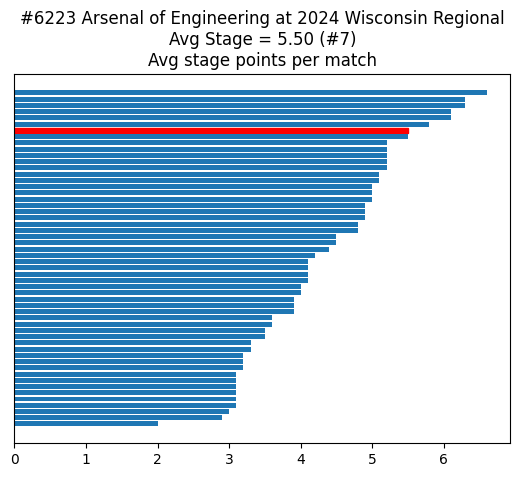

      team  Avg Stage                    Name
0  frc4531        6.6               STEAMpunk
1    frc93        6.3         NEW Apple Corps
2  frc6381        6.3     Red Raider Robotics
3  frc2077        6.1          Laser Robotics
4  frc1732        6.1     Hilltopper Robotics
5  frc3197        5.8               HexHounds
6  frc6223        5.5  Arsenal of Engineering
7  frc2062        5.5               CORE 2062
8  frc4787        5.2                   Axiom
9  frc9535        5.2               The Knack


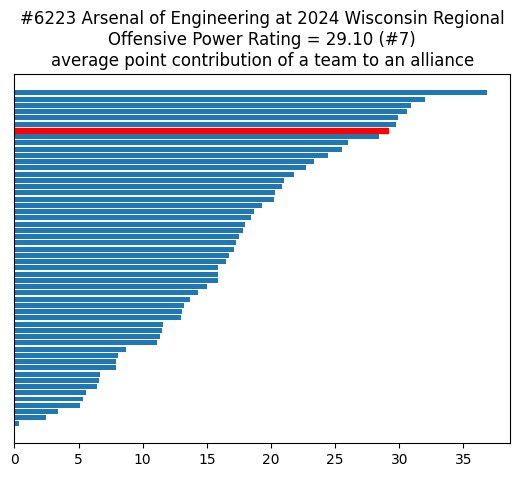

      team        opr                      Name
0  frc1714  36.816284             MORE Robotics
1  frc1732  32.029102       Hilltopper Robotics
2  frc1781  30.920013  Lindblom Electric Eagles
3  frc2194  30.601834                Fondy Fire
4  frc3630  29.880589                  Stampede
5  frc9535  29.755144                 The Knack
6  frc6223  29.100187    Arsenal of Engineering
7  frc8744  28.398148                Leviathans
8    frc93  25.973682           NEW Apple Corps
9   frc930  25.543970           Mukwonago BEARs


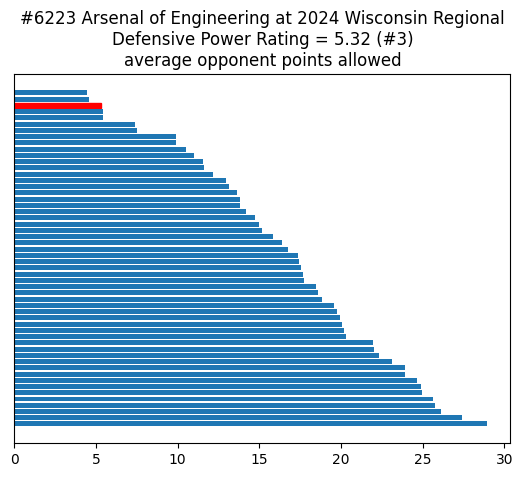

      team        dpr                      Name
0  frc1792   4.435890      Round Table Robotics
1  frc4786   4.547402              Nicolet FEAR
2  frc6223   5.322229    Arsenal of Engineering
3  frc9535   5.414491                 The Knack
4  frc1781   5.451945  Lindblom Electric Eagles
5  frc5148   7.367702          New Berlin Blitz
6   frc930   7.517081           Mukwonago BEARs
7   frc706   9.898672                Cyberhawks
8  frc2202   9.915067            BEAST Robotics
9  frc6574  10.476903               Ferradermis


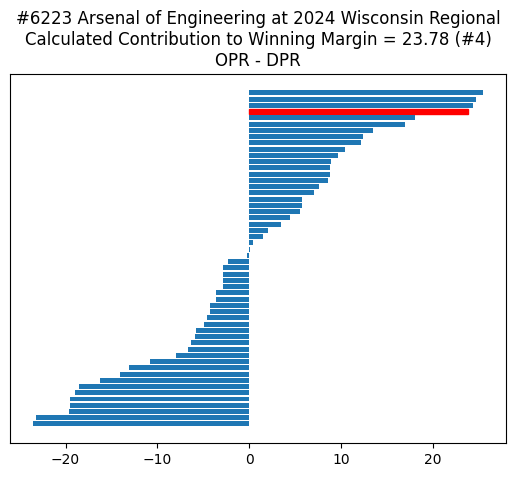

      team       ccwm                      Name
0  frc1781  25.468068  Lindblom Electric Eagles
1  frc1714  24.631793             MORE Robotics
2  frc9535  24.340653                 The Knack
3  frc6223  23.777958    Arsenal of Engineering
4   frc930  18.026889           Mukwonago BEARs
5  frc3630  16.899066                  Stampede
6  frc8744  13.432261                Leviathans
7    frc93  12.352932           NEW Apple Corps
8  frc2194  12.139842                Fondy Fire
9  frc4786  10.428843              Nicolet FEAR


In [16]:
print_chart(df, 'Ranking Score', 'Ranking Score\n2 for win, max possible is 4')
print_chart(df, 'Ranking Points', 'Ranking Points\nTotal for Event')
print_chart(df, 'Avg Coop', 'Avg Coop\nEither 0 or 1 per match')
print_chart(df, 'Avg Match', 'Avg Match\nAvg points per match')
print_chart(df, 'Avg Auto', 'Avg Auto\nAvg auto points per match')
print_chart(df, 'Avg Stage', 'Avg Stage\nAvg stage points per match')

print_chart(df, 'opr', 'Offensive Power Rating\naverage point contribution of a team to an alliance')
print_chart(df, 'dpr', 'Defensive Power Rating\naverage opponent points allowed', True)
print_chart(df, 'ccwm', 'Calculated Contribution to Winning Margin\nOPR - DPR')

# Count undefeated teams

In [17]:
year = '2024'
url = f'https://www.thebluealliance.com/api/v3/events/{year}/simple'
events = util.call_tba_api(url).json()
event_count = 0
team_appearances = 0
undefeated = 0
for e in events:
    # Event type: 0 - regional, 1 - district...
    if datetime.strptime(e['end_date'], "%Y-%m-%d") < datetime.now() and e['event_type'] == 0:
        event_count += 1
        event_code = year + e['event_code']
        match_date = e['end_date']
        event_name = e['name']
        print(event_code, event_name, match_date)

        url = f'https://www.thebluealliance.com/api/v3/event/{event_code}/rankings'
        rankings = util.call_tba_api(url).json()
        teams = 0
        for r in rankings['rankings']:
            teams += 1
            if r['record']['wins'] > 0 and r['record']['losses'] == 0 and r['record']['ties'] == 0:
                team_key = r['team_key']
                url = f'https://www.thebluealliance.com/api/v3/team/{team_key}'
                t = util.call_tba_api(url).json()
                team_name = t['nickname']
                print('  ', team_key, r['rank'], t['city'], t['state_prov'] )
                undefeated += 1
        team_appearances += teams
        print('  ', teams, 'teams')

# Clean up variables
del e, event_name, events, match_date, r, rankings, t, team_key, teams, url, year, event_code, team_name

print('Events:', event_count)
print('Team appearances:', team_appearances)
print('Undefeated:', undefeated, f'{undefeated/team_appearances:.1%}')


 

2024arli Arkansas Regional 2024-03-09
   28 teams
2024ausc Southern Cross Regional 2024-03-17
   frc8814 2 Shanghai Shanghai
   47 teams
2024azva Arizona Valley Regional 2024-03-16
   41 teams
2024bcvi Canadian Pacific Regional 2024-03-02
   36 teams
2024brbr Brazil Regional 2024-03-02
   frc1156 1 Novo Hamburgo Rio Grande do Sul
   frc9602 2 SINOP Mato Grosso
   frc9175 3 catalão Goiás
   55 teams
2024cada Sacramento Regional 2024-03-16
   38 teams
2024cala Los Angeles Regional 2024-03-17
   frc368 1 Honolulu Hawaii
   44 teams
2024caph Hueneme Port Regional 2024-03-03
   50 teams
2024casf San Francisco Regional 2024-03-10
   frc114 1 Los Altos California
   43 teams
2024casj Silicon Valley Regional 2024-03-03
   frc581 1 San Jose California
   42 teams
2024cave Ventura County Regional 2024-03-10
   frc4414 1 Ventura California
   48 teams
2024flta Tallahassee Regional 2024-03-16
   44 teams
2024flwp South Florida Regional 2024-03-02
   39 teams
2024ilpe Central Illinois Regional 2024